In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Change to processed data
outputPath = "https://raw.githubusercontent.com/Jokoisme/penguins-classification/main/data/processed/penguins_processed.csv"
data = pd.read_csv(outputPath)

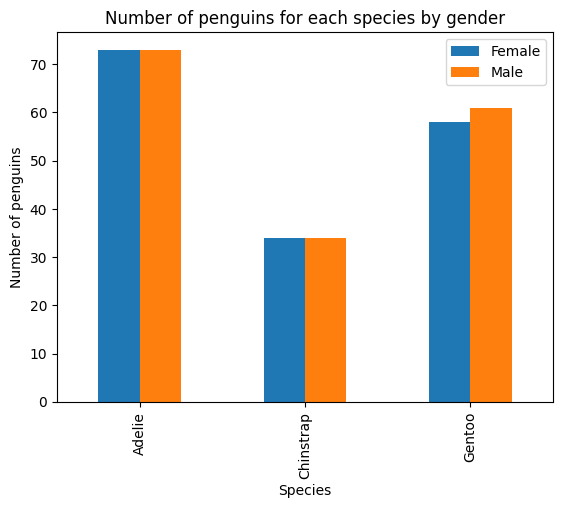

In [3]:
# Get species per gender count
sex_column = data['sex']
data.groupby(["species", sex_column]).size().unstack(level=1).plot(kind='bar')
plt.xlabel("Species")
plt.ylabel("Number of penguins")
plt.title("Number of penguins for each species by gender")
plt.legend()
plt.show()

#figPath = "results/figures/speciesCount.png"
#plt.savefig(figPath)

In [4]:
# Basic statistics
print(data.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


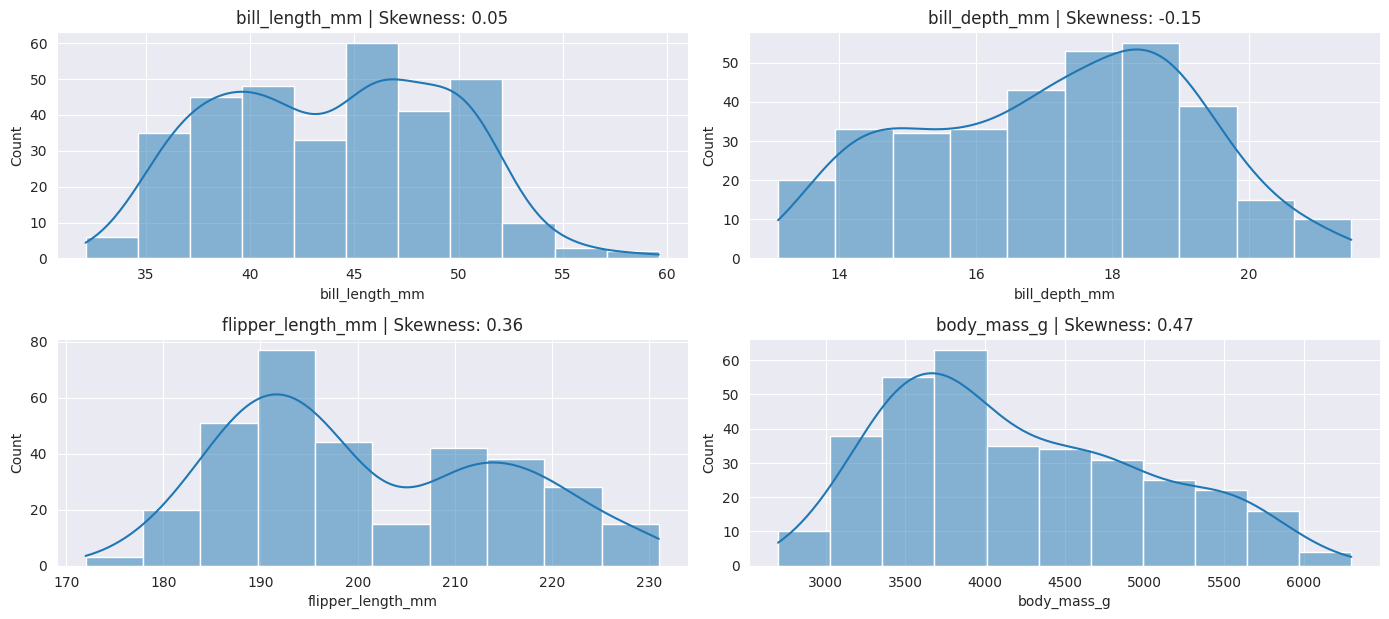

In [5]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

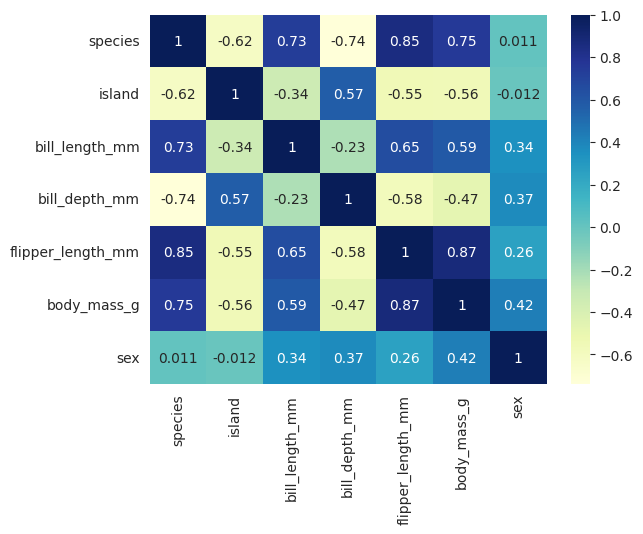

In [6]:
# Correlation

# Change String data values to categorical
data['species'] = data['species'].astype('category').cat.codes
data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

#figPath = "results/figures/correlation.png"
#plt.savefig(figPath)